### Track Clustering

We applied KMeans clustering algorithm to group songs with similar features and also to reduce dimension. We ran this file on local setup for small value of k. For large value of k, we did Spark programming and ran jobs in EMR cluster. Same code is used for Session state clustering but with different data.

In [1]:
import pandas as pd
latent_track = pd.read_csv('latent_track_features.csv')

In [2]:
latent_track.head()

,track_id,0,1,2,3,4,5,6,7
0,t_f9b9a072-8dae-4816-bfd6-d91fc75a5744,0.085536,0.023943,0.125375,-0.145933,0.449010,-0.106019,-0.190885,0.282416
1,t_7f435320-5d3b-497d-9346-0c97429af2b9,0.152102,-0.118725,-0.168167,0.291125,0.540807,0.042686,-0.288468,0.130090
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,0.056647,-0.077121,0.052887,-0.076303,0.644329,-0.148826,-0.292301,0.208705
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,0.120041,-0.071038,-0.012514,-0.061835,0.621581,-0.082328,-0.210929,0.185848
4,t_3c2c29b5-c738-42c0-83e1-ee0e88ac834d,0.075071,0.094992,0.372702,0.001345,0.534761,-0.017185,-0.420036,0.035725


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac1d748>,
      dtype=object)

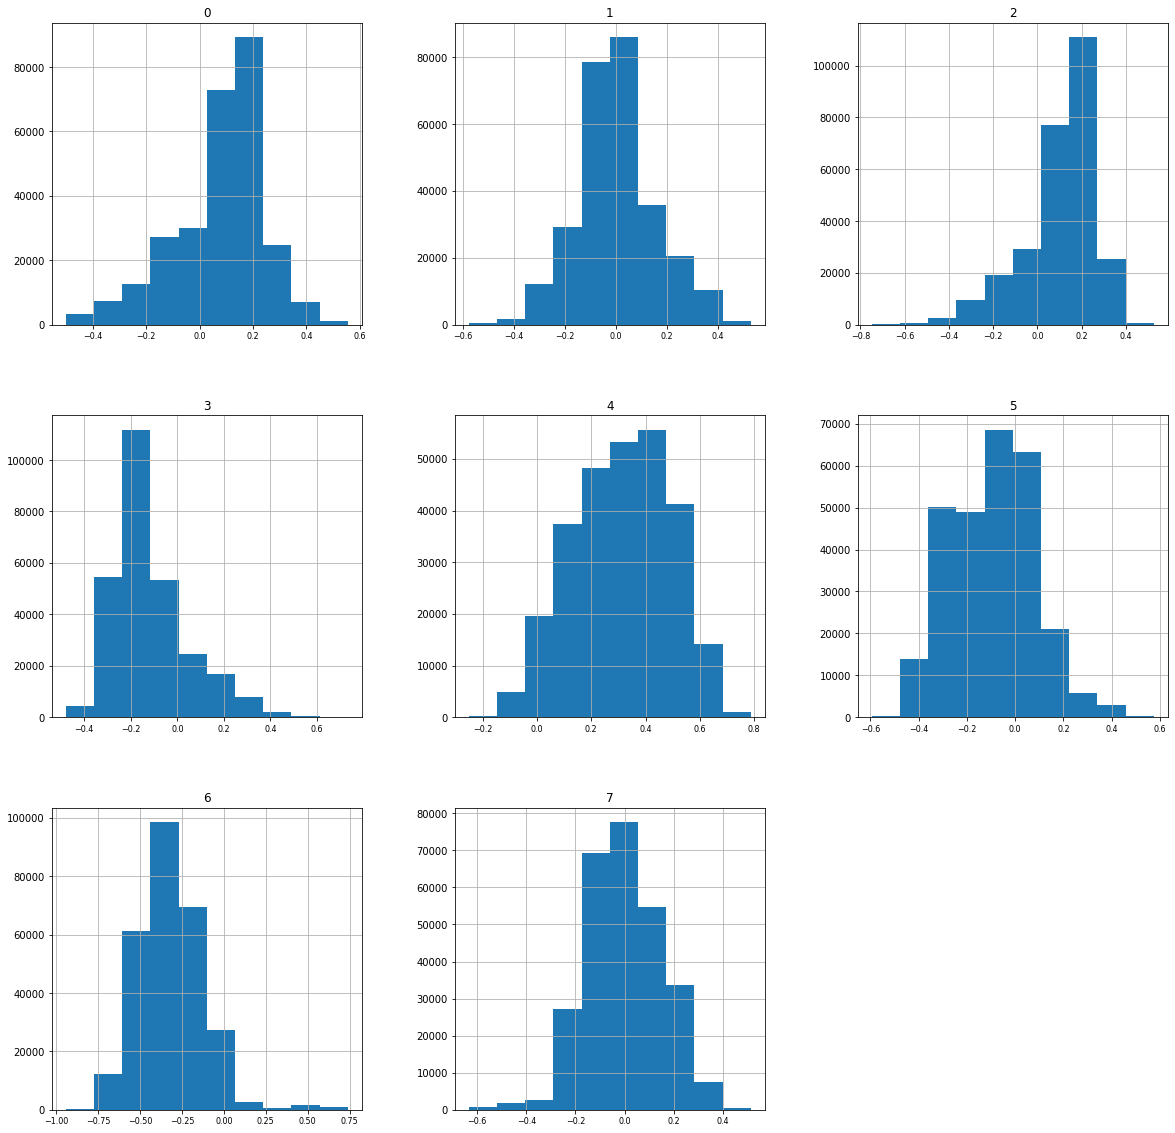

In [6]:
latent_track.hist(xlabelsize=8, figsize=(20,20))

Data normalization because KMeans cannot take values below 0.

In [0]:
for col in (latent_track.drop('track_id', axis=1)).columns:
    latent_track[col] = ((latent_track[col] - latent_track[col].min()) / (latent_track[col].max() - latent_track[col].min()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c64de31d0>,
      dtype=object)

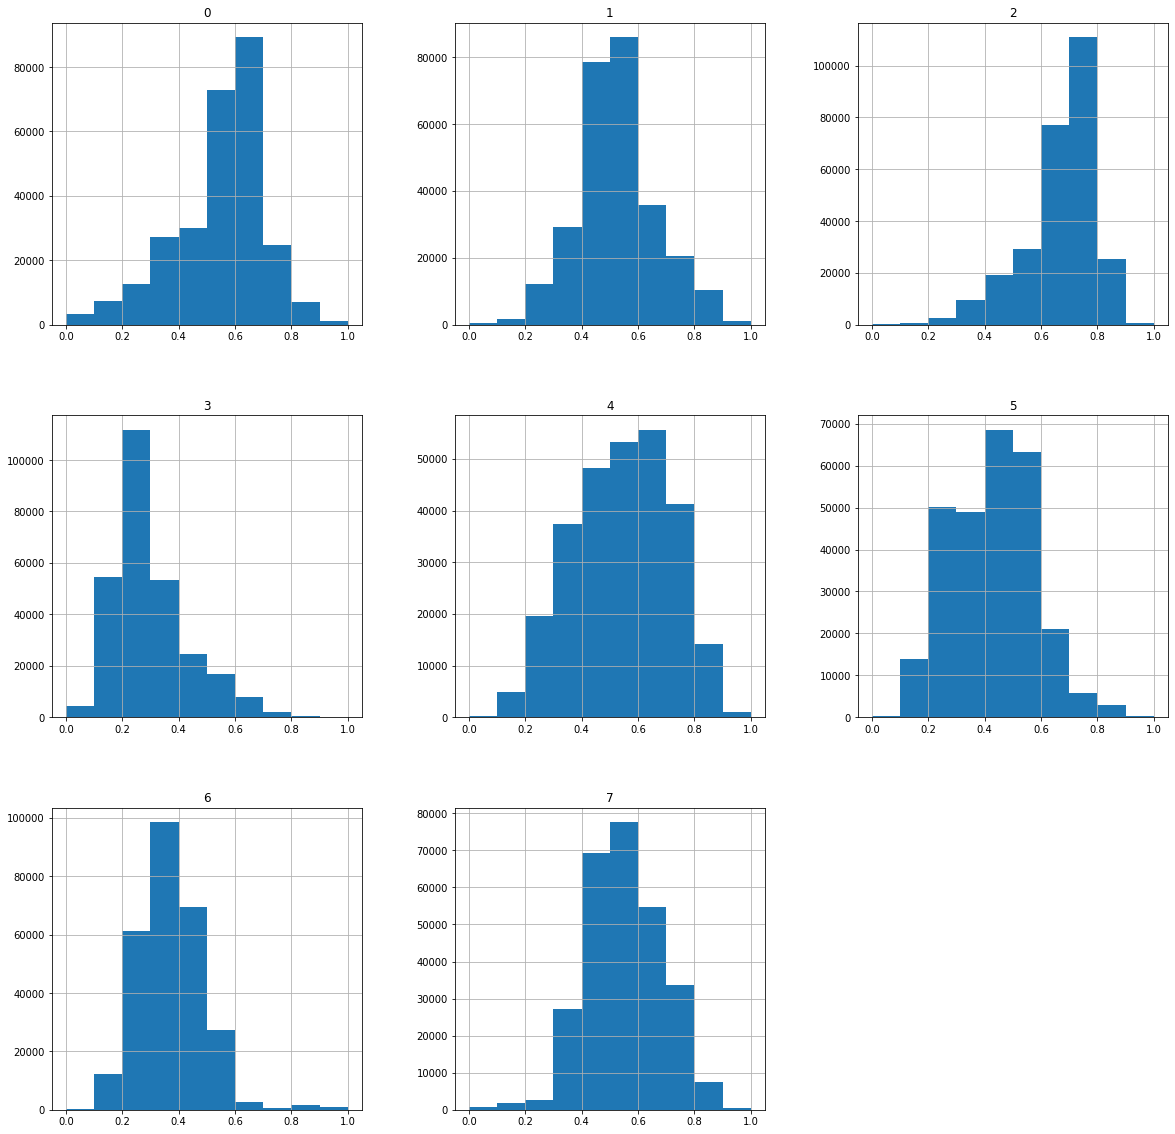

In [11]:
latent_track.hist(figsize=(20, 20))

As you can see, all values (negative or greater than 1) are now within the range of [0,1]

In [0]:
from sklearn.cluster import KMeans
from tqdm import tqdm

kmeans_model = KMeans(n_clusters=100, random_state=3).fit(latent_track.drop('track_id', axis=1))
preds = kmeans_model.predict(latent_track.drop('track_id', axis=1))

latent_track['cluster'] = preds

In [16]:
latent_track.head()

,track_id,0,1,2,3,4,5,6,7,cluster
0,t_f9b9a072-8dae-4816-bfd6-d91fc75a5744,0.555277,0.543247,0.685906,0.274507,0.674009,0.417390,0.446871,0.799099,21
1,t_7f435320-5d3b-497d-9346-0c97429af2b9,0.618304,0.414371,0.455408,0.635635,0.762511,0.544788,0.388787,0.666174,0
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,0.527924,0.451953,0.628986,0.332040,0.862317,0.380717,0.386505,0.734776,65
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,0.587948,0.457448,0.577631,0.343994,0.840386,0.437686,0.434940,0.714831,93
4,t_3c2c29b5-c738-42c0-83e1-ee0e88ac834d,0.545369,0.607428,0.880114,0.396198,0.756682,0.493495,0.310475,0.583829,92
